## Домашнее задание 6 ##

**1. Взяла для работы датасет https://archive.ics.uci.edu/ml/datasets/Shill+Bidding+Dataset#**

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pylab as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, f1_score, precision_score, recall_score


from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
data = pd.read_csv("Shill_Bidding_Dataset.csv", sep=',')
data.head(3)

,Record_ID,Auction_ID,Bidder_ID,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
0,1,732,_***i,0.200000,0.4,0.0,0.000028,0.0,0.993593,0.000028,0.666667,5,0
1,2,732,g***r,0.024390,0.2,0.0,0.013123,0.0,0.993593,0.013123,0.944444,5,0
2,3,732,t***p,0.142857,0.2,0.0,0.003042,0.0,0.993593,0.003042,1.000000,5,0


Описание датасета

**Record ID** уникальный идентификатор записи в наборе данных

**Auction ID** уникальный идентификатор аукциона

**Bidder ID** уникальный идентификатор участника торгов

**Bidder Tendency** участник торгов на торгах участвует исключительно в аукционах нескольких продавцов, а не в разнообразных 
лотах. Это сговор между продавцом-мошенником и сообщником

**Bidding Ratio** участник торгов на торгах чаще участвует, чтобы поднять цену аукциона и привлечь более высокие ставки от законных участников

**Successive Outbidding** участник торгов последовательно перебивает сам себя, даже если он является текущим победителем, постепенно увеличивая цену с небольшими последовательными приращениями

**Last Bidding** участник торгов становится неактивным на последнем этапе аукциона (более 90% продолжительности аукциона), чтобы не выиграть аукцион

**Auction Bids** Аукционы с SB-деятельностью, как правило, имеют гораздо большее количество ставок, чем среднее количество ставок на параллельных аукционах

**Auction Starting Price** участник торгов обычно предлагает небольшую стартовую цену, чтобы привлечь законных участников торгов на аукцион 

**Early Bidding** участник торгов, как правило, делает ставку на довольно раннем этапе аукциона (менее 25% продолжительности аукциона), чтобы привлечь внимание пользователей аукциона 

**Winning Ratio** участник торгов на торгах участвует во многих аукционах, но вряд ли побеждает ни на одном из них

**Auction Duration**  как долго длился аукцион

**Class** 0 для нормального поведения торгов; 1 в противном случае

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6321 entries, 0 to 6320
Data columns (total 13 columns):
Record_ID                 6321 non-null int64
Auction_ID                6321 non-null int64
Bidder_ID                 6321 non-null object
Bidder_Tendency           6321 non-null float64
Bidding_Ratio             6321 non-null float64
Successive_Outbidding     6321 non-null float64
Last_Bidding              6321 non-null float64
Auction_Bids              6321 non-null float64
Starting_Price_Average    6321 non-null float64
Early_Bidding             6321 non-null float64
Winning_Ratio             6321 non-null float64
Auction_Duration          6321 non-null int64
Class                     6321 non-null int64
dtypes: float64(8), int64(4), object(1)
memory usage: 642.1+ KB


**2. сделать feature engineering**

In [4]:
data = data.drop(['Record_ID', 'Auction_ID', 'Bidder_ID'], axis = 1) #Удалим неинформативные признаки
data.head(3)

,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
0,0.200000,0.4,0.0,0.000028,0.0,0.993593,0.000028,0.666667,5,0
1,0.024390,0.2,0.0,0.013123,0.0,0.993593,0.013123,0.944444,5,0
2,0.142857,0.2,0.0,0.003042,0.0,0.993593,0.003042,1.000000,5,0


In [5]:
data.describe()

,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
count,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000
mean,0.142541,0.127670,0.103781,0.463119,0.231606,0.472821,0.430683,0.367731,4.615093,0.106787
std,0.197084,0.131530,0.279698,0.380097,0.255252,0.489912,0.380785,0.436573,2.466629,0.308867
min,0.000000,0.011765,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.027027,0.043478,0.000000,0.047928,0.000000,0.000000,0.026620,0.000000,3.000000,0.000000
50%,0.062500,0.083333,0.000000,0.440937,0.142857,0.000000,0.360104,0.000000,5.000000,0.000000
75%,0.166667,0.166667,0.000000,0.860363,0.454545,0.993593,0.826761,0.851852,7.000000,0.000000
max,1.000000,1.000000,1.000000,0.999900,0.788235,0.999935,0.999900,1.000000,10.000000,1.000000


In [6]:
data.iloc[:, -1].value_counts()

0    5646
1     675
Name: Class, dtype: int64

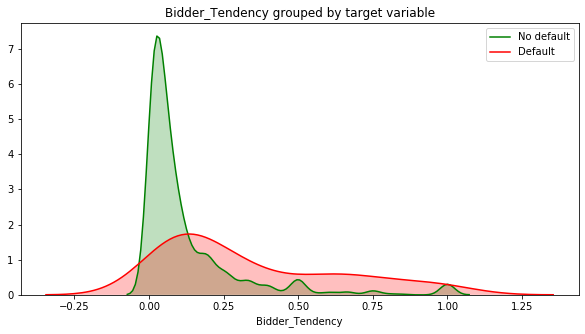

In [7]:
#Оценка признака Bidder_Tendency в разрезе целевой переменной
TARGET_NAME = 'Class'
Bidder_Tendency_with_target = data[['Bidder_Tendency', TARGET_NAME]].sample(1000)
Bidder_Tendency = Bidder_Tendency_with_target['Bidder_Tendency']
Bidder_Tendency_0 = Bidder_Tendency[Bidder_Tendency_with_target[TARGET_NAME] == 0]
Bidder_Tendency_1 = Bidder_Tendency[Bidder_Tendency_with_target[TARGET_NAME] == 1]

plt.figure(figsize=(10, 5))

sns.kdeplot(Bidder_Tendency_0, shade=True, label='No default', color='g')
sns.kdeplot(Bidder_Tendency_1, shade=True, label='Default', color='r')

plt.xlabel('Bidder_Tendency')
plt.title('Bidder_Tendency grouped by target variable');

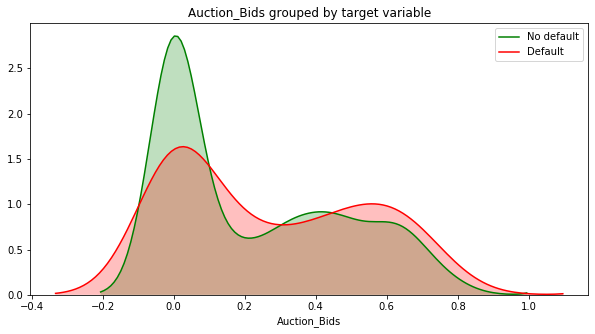

In [8]:
#Оценка признака Auction_Bids в разрезе целевой переменной

Auction_Bids_with_target = data[['Auction_Bids', TARGET_NAME]].sample(1000)
Auction_Bids = Auction_Bids_with_target['Auction_Bids']
Auction_Bids_0 = Auction_Bids[Auction_Bids_with_target[TARGET_NAME] == 0]
Auction_Bids_1 = Auction_Bids[Auction_Bids_with_target[TARGET_NAME] == 1]

plt.figure(figsize=(10, 5))

sns.kdeplot(Auction_Bids_0, shade=True, label='No default', color='g')
sns.kdeplot(Auction_Bids_1, shade=True, label='Default', color='r')

plt.xlabel('Auction_Bids')
plt.title('Auction_Bids grouped by target variable');

**3. обучить любой классификатор (какой вам нравится)**

In [9]:
def score(y, y_pred):
    f1 = f1_score(y, y_pred)
    prec = precision_score(y, y_pred)
    rec = recall_score(y, y_pred)
    roc_auc = roc_auc_score(y, y_pred)
    return f1, prec, rec, roc_auc

In [10]:
#разделим данные на train/test
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns='Class'), data['Class'], test_size=0.25, random_state=0)
#Проверим соотношение целевого признака в train и test
print(f'Доля целевого призака в train = {y_train.mean()}')
print(f'Доля целевого призака в test = {y_test.mean()}')

Доля целевого призака в train = 0.10886075949367088
Доля целевого призака в test = 0.10056925996204934


In [11]:
gb_model = GradientBoostingClassifier(random_state=0)
gb_model.fit(X_train, y_train)
y_pred = gb_model.predict(X_test)
y_pred[:10]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

In [12]:
results = pd.DataFrame(
    data=[['GradBoost'] + list(score(y_test, y_pred))],
    columns=['model', 'f1_score', 'precision', 'recall', 'roc_auc']
)
results

,model,f1_score,precision,recall,roc_auc
0,GradBoost,0.98452,0.969512,1.0,0.998242


**4. далее разделить ваш набор данных на два множества: P (positives) и U (unlabeled). Причем брать нужно не все положительные (класс 1) примеры, а только лишь часть**

In [13]:
mod_data = data.copy()
#get the indices of the positives samples
pos_ind = np.where(mod_data.iloc[:,-1].values == 1)[0]
#shuffle them
np.random.shuffle(pos_ind)
# leave just 25% of the positives marked
pos_sample_len = int(np.ceil(0.25 * len(pos_ind)))
print(f'Using {pos_sample_len}/{len(pos_ind)} as positives and unlabeling the rest')
pos_sample = pos_ind[:pos_sample_len]

Using 169/675 as positives and unlabeling the rest


In [14]:
mod_data['class_test'] = -1
mod_data.loc[pos_sample,'class_test'] = 1
print('target variable:\n', mod_data.iloc[:,-1].value_counts())

target variable:
 -1    6152
 1     169
Name: class_test, dtype: int64


In [15]:
mod_data.head(10)

,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class,class_test
0,0.200000,0.400000,0.0,0.000028,0.000000,0.993593,0.000028,0.666667,5,0,-1
1,0.024390,0.200000,0.0,0.013123,0.000000,0.993593,0.013123,0.944444,5,0,-1
2,0.142857,0.200000,0.0,0.003042,0.000000,0.993593,0.003042,1.000000,5,0,-1
3,0.100000,0.200000,0.0,0.097477,0.000000,0.993593,0.097477,1.000000,5,0,-1
4,0.051282,0.222222,0.0,0.001318,0.000000,0.000000,0.001242,0.500000,7,0,-1
5,0.038462,0.111111,0.0,0.016844,0.000000,0.000000,0.016844,0.800000,7,0,-1
6,0.400000,0.222222,0.0,0.006781,0.000000,0.000000,0.006774,0.750000,7,0,-1
7,0.137931,0.444444,1.0,0.768044,0.000000,0.000000,0.016311,1.000000,7,1,1
8,0.121951,0.185185,1.0,0.035021,0.333333,0.993528,0.023963,0.944444,7,1,-1
9,0.155172,0.346154,0.5,0.570994,0.307692,0.993593,0.413788,0.611111,7,1,-1


In [16]:
x_data = mod_data.iloc[:,:-2].values # just the X 
y_labeled = mod_data.iloc[:,-1].values # new class (just the P & U)
y_positive = mod_data.iloc[:,-2].values # original class

**5. применить random negative sampling для построения классификатора в новых условиях**

In [17]:
mod_data = mod_data.sample(frac=1)
neg_sample = mod_data[mod_data['class_test']==-1][:len(mod_data[mod_data['class_test']==1])]
sample_test = mod_data[mod_data['class_test']==-1][len(mod_data[mod_data['class_test']==1]):]
pos_sample = mod_data[mod_data['class_test']==1]
print(neg_sample.shape, pos_sample.shape)
sample_train = pd.concat([neg_sample, pos_sample]).sample(frac=1)

(169, 11) (169, 11)


In [18]:
gb_model_rn = GradientBoostingClassifier(random_state=0)
gb_model_rn.fit(sample_train.iloc[:,:-2].values, 
          sample_train.iloc[:,-2].values)
y_pred = gb_model_rn.predict(sample_test.iloc[:,:-2].values)
y_pred[:10]

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

**6. сравнить качество с решением из пункта 4 (построить отчет - таблицу метрик)**

In [19]:
results = results.append(pd.DataFrame(
    data=[['PU GradBoost_25%'] + list(score(sample_test.iloc[:,-2].values, y_pred))],
    columns=results.columns
), ignore_index=True)

results

,model,f1_score,precision,recall,roc_auc
0,GradBoost,0.984520,0.969512,1.000000,0.998242
1,PU GradBoost_25%,0.850655,0.743511,0.993878,0.981647


Заметно снизился precision у PU GradBoost, необходим более тщательный подбор порога.

**7. поэкспериментировать с долей P на шаге 5 (как будет меняться качество модели при уменьшении/увеличении размера P)**

In [20]:
mod_data = data.copy()
#get the indices of the positives samples
pos_ind = np.where(mod_data.iloc[:,-1].values == 1)[0]
#shuffle them
np.random.shuffle(pos_ind)
# leave just 10% of the positives marked
pos_sample_len = int(np.ceil(0.1 * len(pos_ind)))
print(f'Using {pos_sample_len}/{len(pos_ind)} as positives and unlabeling the rest')
pos_sample = pos_ind[:pos_sample_len]

mod_data['class_test'] = -1
mod_data.loc[pos_sample,'class_test'] = 1
print('target variable:\n', mod_data.iloc[:,-1].value_counts())

x_data = mod_data.iloc[:,:-2].values # just the X 
y_labeled = mod_data.iloc[:,-1].values # new class (just the P & U)
y_positive = mod_data.iloc[:,-2].values # original class

mod_data = mod_data.sample(frac=1)
neg_sample = mod_data[mod_data['class_test']==-1][:len(mod_data[mod_data['class_test']==1])]
sample_test = mod_data[mod_data['class_test']==-1][len(mod_data[mod_data['class_test']==1]):]
pos_sample = mod_data[mod_data['class_test']==1]
print(neg_sample.shape, pos_sample.shape)
sample_train = pd.concat([neg_sample, pos_sample]).sample(frac=1)

gb_model_rn = GradientBoostingClassifier(random_state=0)
gb_model_rn.fit(sample_train.iloc[:,:-2].values, 
          sample_train.iloc[:,-2].values)
#y_pred = gb_model_rn.predict(sample_test.iloc[:,:-2].values)
y_pred = (gb_model_rn.predict_proba(sample_test.iloc[:,:-2].values)[:,1] >= 0.7).astype(bool)

results = results.append(pd.DataFrame(
    data=[['PU GradBoost_10%'] + list(score(sample_test.iloc[:,-2].values, y_pred))],
    columns=results.columns
), ignore_index=True)

results

Using 68/675 as positives and unlabeling the rest
target variable:
 -1    6253
 1      68
Name: class_test, dtype: int64
(68, 11) (68, 11)


,model,f1_score,precision,recall,roc_auc
0,GradBoost,0.984520,0.969512,1.000000,0.998242
1,PU GradBoost_25%,0.850655,0.743511,0.993878,0.981647
2,PU GradBoost_10%,0.888552,0.816156,0.975042,0.975701


In [21]:
mod_data = data.copy()
#get the indices of the positives samples
pos_ind = np.where(mod_data.iloc[:,-1].values == 1)[0]
#shuffle them
np.random.shuffle(pos_ind)
# leave just 10% of the positives marked
pos_sample_len = int(np.ceil(0.5 * len(pos_ind)))
print(f'Using {pos_sample_len}/{len(pos_ind)} as positives and unlabeling the rest')
pos_sample = pos_ind[:pos_sample_len]

mod_data['class_test'] = -1
mod_data.loc[pos_sample,'class_test'] = 1
print('target variable:\n', mod_data.iloc[:,-1].value_counts())

x_data = mod_data.iloc[:,:-2].values # just the X 
y_labeled = mod_data.iloc[:,-1].values # new class (just the P & U)
y_positive = mod_data.iloc[:,-2].values # original class

mod_data = mod_data.sample(frac=1)
neg_sample = mod_data[mod_data['class_test']==-1][:len(mod_data[mod_data['class_test']==1])]
sample_test = mod_data[mod_data['class_test']==-1][len(mod_data[mod_data['class_test']==1]):]
pos_sample = mod_data[mod_data['class_test']==1]
print(neg_sample.shape, pos_sample.shape)
sample_train = pd.concat([neg_sample, pos_sample]).sample(frac=1)

gb_model_rn = GradientBoostingClassifier(random_state=0)
gb_model_rn.fit(sample_train.iloc[:,:-2].values, 
          sample_train.iloc[:,-2].values)
#y_pred = gb_model_rn.predict(sample_test.iloc[:,:-2].values)
y_pred = (gb_model_rn.predict_proba(sample_test.iloc[:,:-2].values)[:,1] >= 0.7).astype(bool)

results = results.append(pd.DataFrame(
    data=[['PU GradBoost_50%'] + list(score(sample_test.iloc[:,-2].values, y_pred))],
    columns=results.columns
), ignore_index=True)

results

Using 338/675 as positives and unlabeling the rest
target variable:
 -1    5983
 1     338
Name: class_test, dtype: int64
(338, 11) (338, 11)


,model,f1_score,precision,recall,roc_auc
0,GradBoost,0.984520,0.969512,1.000000,0.998242
1,PU GradBoost_25%,0.850655,0.743511,0.993878,0.981647
2,PU GradBoost_10%,0.888552,0.816156,0.975042,0.975701
3,PU GradBoost_50%,0.905933,0.834667,0.990506,0.989436


За счет подбора порога немного выровнялись precision recall для PU GradBoost_10% и PU GradBoost_50%. Наилучшие показатели при использовании 50% позитивов.